In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from noiselab.tdigest import TDigest

In [2]:
def plot_distribution(dist, title=None, size=100_000, compression=400):
    td = TDigest(compression=compression)
    noise = dist.rvs(size=size)
    td.extend(noise)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 6))
    ax1.set_title(title)
    
    x_vec = np.linspace(td.quantile(0.0001), td.quantile(0.9999), num=10_000)
    ax1.plot(x_vec, td.cdfs(x_vec))
    ax1.plot(x_vec, dist.cdf(x_vec), 'r--', lw=2, label='gamma cdf')
    
    ax1.set_ylabel('CDF')
    
    ax2.hist(noise, density=True, bins=100, histtype='stepfilled',)
    ax2.plot(x_vec, dist.pdf(x_vec), 'r--', lw=2, label='gamma pdf')
    
    cdf = td.cdfs(x_vec)
    ax2.plot(x_vec[0:-1], np.diff(cdf)/np.diff(x_vec))
   
    ax2.set_ylabel('PDF')
    return fig

# Normal distribution

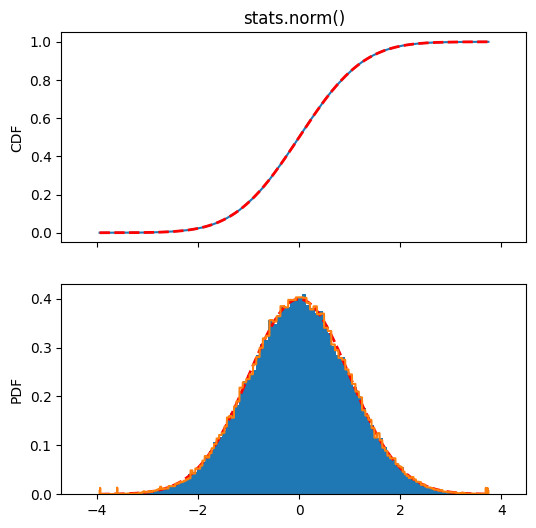

In [3]:
plot_distribution(stats.norm(), title='stats.norm()');

# Gamma distribution

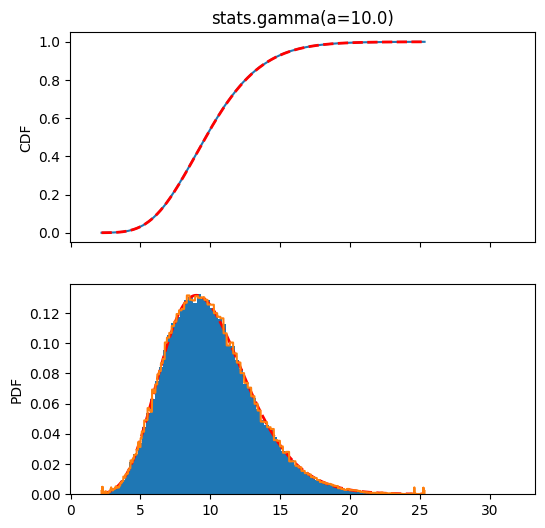

In [4]:
plot_distribution(stats.gamma(a=10.0), title='stats.gamma(a=10.0)');

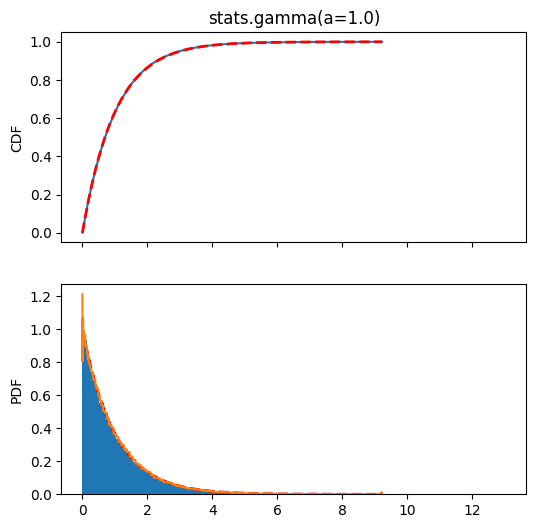

In [5]:
plot_distribution(stats.gamma(a=1.0), title='stats.gamma(a=1.0)');

# Chi-sqaured distribution

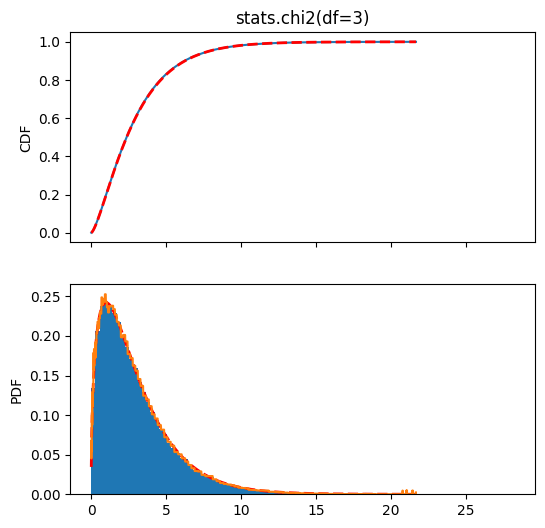

In [6]:
plot_distribution(stats.chi2(df=3), title='stats.chi2(df=3)');

# Student-T distribution

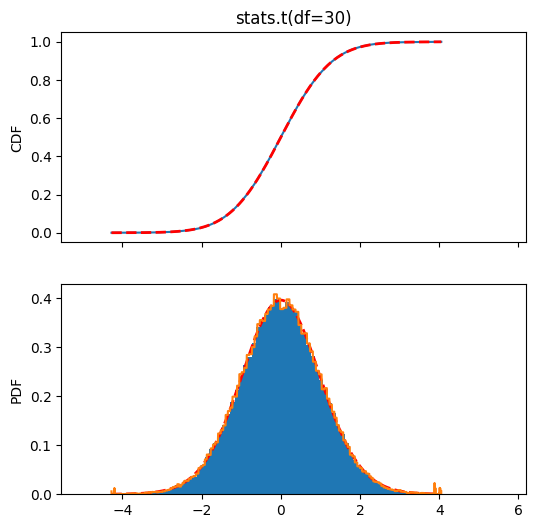

In [7]:
plot_distribution(stats.t(df=30), title='stats.t(df=30)');

# Beta distribution

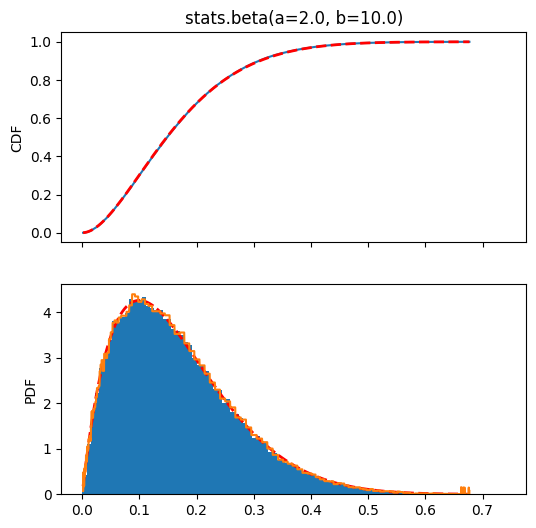

In [8]:
plot_distribution(stats.beta(a=2.0, b=10.0), title='stats.beta(a=2.0, b=10.0)');

# Cosine distribution

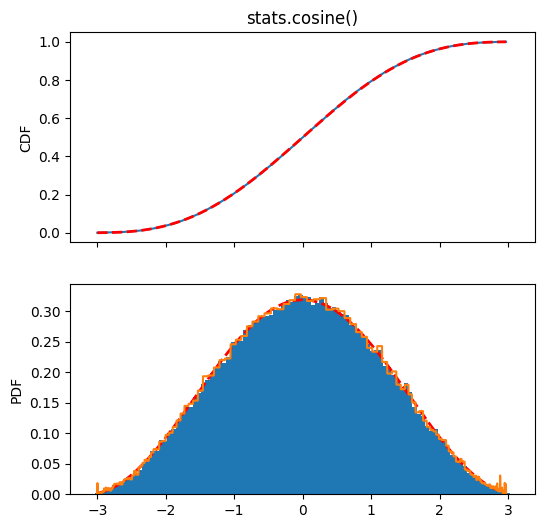

In [9]:
plot_distribution(stats.cosine(), title='stats.cosine()');

# Laplace distribution

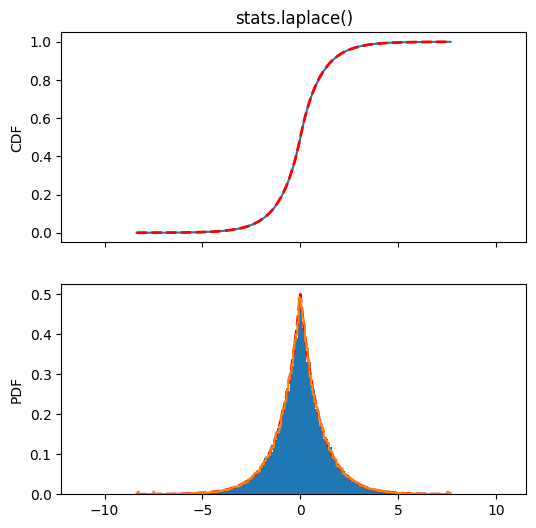

In [10]:
plot_distribution(stats.laplace(), title='stats.laplace()');